# Generalization with OOP: The ConBacktester Class

## Using the ConBacktester Class

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [25]:
df = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,1.311810,1.602420
2019-12-30 04:00:00+00:00,1.119940,1.311880,1.600800
2019-12-30 10:00:00+00:00,1.120095,1.311465,1.601165


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  2070 non-null   float64
 1   GBPUSD  2074 non-null   float64
 2   EURAUD  2071 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


In [27]:
ptc = 0.00007

In [28]:
import ConBacktester as Con

In [29]:
tester = Con.ConBacktester("EURUSD", "2018-01-01", "2019-12-31", ptc)

In [30]:
tester

ConBacktester(symbol = EURUSD, start = 2018-01-01, end = 2019-12-31)

In [31]:
tester.test_strategy()

(0.963517, 0.035345)

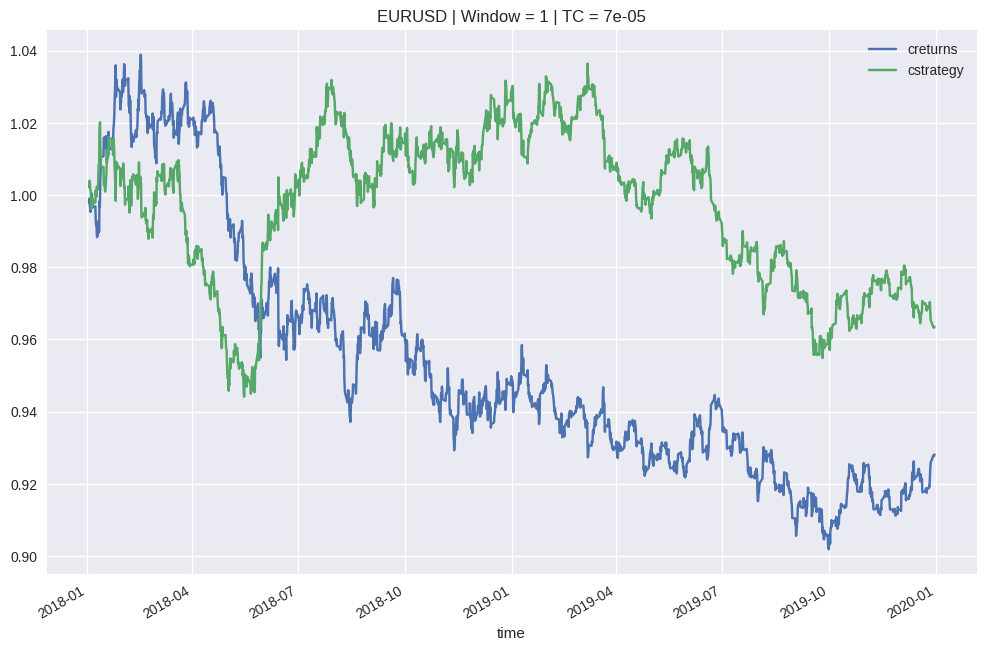

In [32]:
tester.plot_results()

In [33]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,0.0,0.997834,1.002171
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.000989,2.0,0.998960,1.003162
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000781,2.0,0.998041,1.003946
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.0,0.997324,1.003225
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.0,0.996106,1.002000
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.0,0.927812,0.963413
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.0,0.927828,0.963396
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.0,0.927957,0.963262


In [34]:
tester.optimize_parameter((1, 500, 1))

(51, 1.262038)

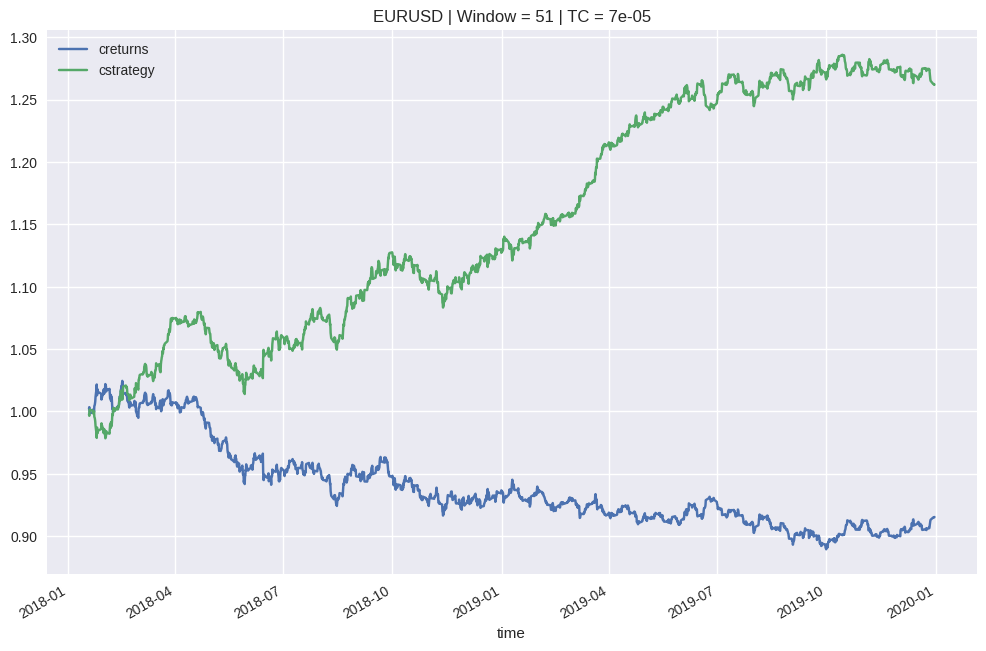

In [35]:
tester.plot_results()

In [36]:
tester.results_overview

,window,performance
0,1,0.963517
1,2,0.948640
2,3,1.018994
3,4,0.824664
4,5,0.859497
...,...,...
494,495,0.983444
495,496,0.976259
496,497,0.971740
497,498,0.961736


In [37]:
tester.results_overview.nlargest(10, "performance")

,window,performance
50,51,1.262038
43,44,1.260746
49,50,1.238808
54,55,1.235083
53,54,1.234555
52,53,1.231764
55,56,1.228589
37,38,1.216351
51,52,1.214277
44,45,1.204657


In [38]:
tester.results_overview.nsmallest(10, "performance")

,window,performance
3,4,0.824664
4,5,0.859497
6,7,0.884717
8,9,0.884933
10,11,0.895513
5,6,0.913512
9,10,0.916414
7,8,0.917729
255,256,0.921709
257,258,0.924776


In [39]:
tester = Con.ConBacktester("GBPUSD", "2018-01-01", "2019-12-31", 0)

In [40]:
tester.test_strategy()

(1.079377, 0.110492)

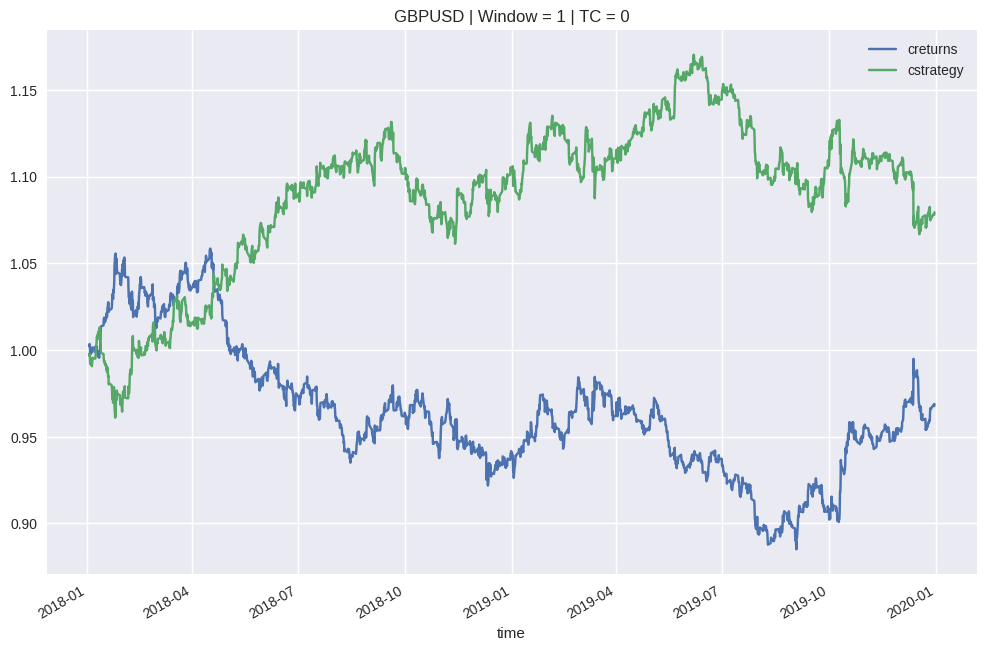

In [41]:
tester.plot_results()

In [42]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 10:00:00+00:00,1.357860,0.002234,-1.0,-0.002234,0.0,1.002236,0.997769
2018-01-02 16:00:00+00:00,1.359180,0.000972,-1.0,-0.000972,0.0,1.003211,0.996800
2018-01-02 22:00:00+00:00,1.359530,0.000257,-1.0,-0.000257,0.0,1.003469,0.996543
2018-01-03 04:00:00+00:00,1.358605,-0.000681,1.0,0.000681,2.0,1.002786,0.997221
2018-01-03 10:00:00+00:00,1.351485,-0.005254,1.0,-0.005254,0.0,0.997531,0.991995
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.311810,0.002484,-1.0,0.002484,2.0,0.968247,1.078098
2019-12-30 04:00:00+00:00,1.311880,0.000053,-1.0,-0.000053,0.0,0.968299,1.078041
2019-12-30 10:00:00+00:00,1.311465,-0.000316,1.0,0.000316,2.0,0.967992,1.078382


In [43]:
tester.results.trades.value_counts()

trades
2.0    1056
0.0    1012
1.0       4
Name: count, dtype: int64

In [44]:
tester.optimize_parameter((1, 500, 1))

(56, 1.21961)

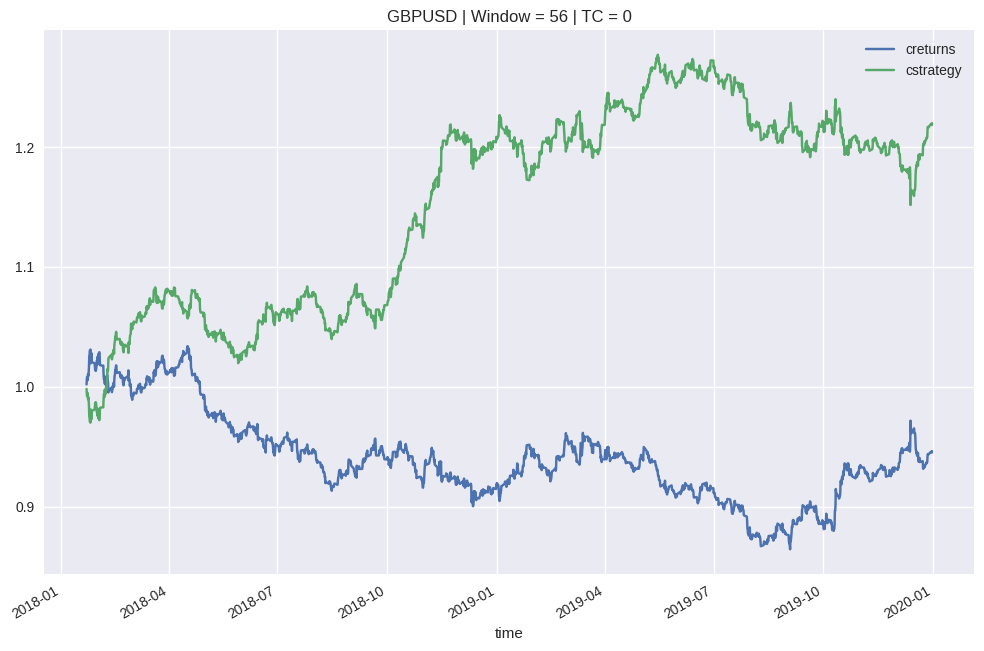

In [45]:
tester.plot_results()

In [46]:
tester.results.trades.value_counts()

trades
0.0    1900
2.0     117
Name: count, dtype: int64

## OOP Challenge: Create the ConBacktester Class from scratch

__Steps__:

1. Initialize the properties __symbol__, __start__, __end__, __tc__, __results__. 

2. Add the method __get_data()__ retrieving & preparing raw data from "intraday_pairs.csv". Call get_data() in the "dunder init" method.

3. Add the method __test_strategy()__ with the paramter window = .

4. Add the method __plot_results()__.

5. Add the method __optimize_parameter__ (only one parameter, no combinations required)

6. Add an appropriate (string) __representation__ and __Docstrings__.

# Solutions (Stop here if you want to code on your own!)

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [47]:
class ConBacktester():
    ''' Class for the vectorized backtesting of simple contrarian trading strategies.
    '''    
    
    def __init__(self, symbol, start, end, tc):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        start: str
            start date for data import
        end: str
            end date for data import
        tc: float
            proportional transaction/trading costs per trade
        '''
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        
    def __repr__(self):
        return "ConBacktester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data from intraday_pairs.csv (source can be changed).
        '''
        raw = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def test_strategy(self, window = 1):
        ''' Backtests the simple contrarian trading strategy.
        
        Parameters
        ----------
        window: int
            time window (number of bars) to be considered for the strategy.
        '''
        self.window = window
        data = self.data.copy().dropna()
        data["position"] = -np.sign(data["returns"].rolling(self.window).mean())
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine the number of trades in each bar
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction/trading costs from pre-cost return
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | Window = {} | TC = {}".format(self.symbol, self.window, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_parameter(self, window_range):
        ''' Finds the optimal strategy (global maximum) given the window parameter range.

        Parameters
        ----------
        window_range: tuple
            tuples of the form (start, end, step size)
        '''
        
        windows = range(*window_range)
            
        results = []
        for window in windows:
            results.append(self.test_strategy(window)[0])
        
        best_perf = np.max(results) # best performance
        opt = windows[np.argmax(results)] # optimal parameter
        
        # run/set the optimal strategy
        self.test_strategy(opt)
        
        # create a df with many results
        many_results =  pd.DataFrame(data = {"window": windows, "performance": results})
        self.results_overview = many_results
        
        return opt, best_perf
                               